# Gaussian Naive Bayes

In Bayesian classification, we're interested in finding the probability of a label given some observed features, which we can write as $P(L~|~{\rm features})$.
Bayes's theorem tells us how to express this in terms of quantities we can compute more directly:

$$
P(L~|~{\rm features}) = \frac{P({\rm features}~|~L)P(L)}{P({\rm features})}
$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)

In [4]:
X[0:5]

array([[ 0.92141506, -9.98499137],
       [-5.26927614, -9.6186543 ],
       [-0.45292089, -6.04316334],
       [-0.0856312 , -2.16867404],
       [ 1.53194956, -0.36022153]])

In [5]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

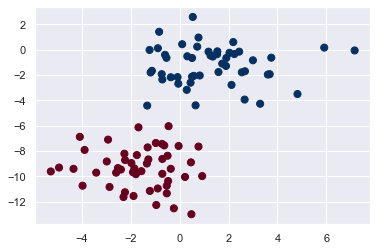

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
model = GaussianNB()
model.fit(X, y);

Now let's generate some new data and predict the label:

In [9]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(1000, 2)
ynew = model.predict(Xnew)

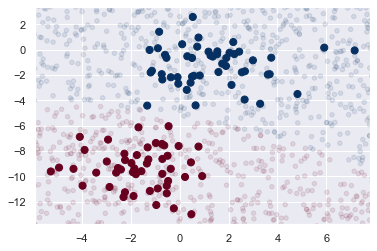

In [10]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [11]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.92, 0.08],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ]])

In [12]:
ynew[-8:]  # 0 is first class, 1 is second class

array([0, 0, 1, 1, 1, 1, 1, 1])

In [13]:
Xnew[-8:]

array([[ 4.24702389, -7.83992604],
       [-0.74176013, -7.53608286],
       [ 2.63265821,  2.20738264],
       [-3.57529469,  1.75359298],
       [-5.61285581, -2.11390527],
       [-0.19785578,  0.24306794],
       [ 4.09677358, -5.35805947],
       [ 3.01409651, -4.96808365]])

### Gaussian Naive Bayes - Iris dataset

In [14]:
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [15]:
# load the iris datasets
dataset = datasets.load_iris()

In [16]:
dataset.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [17]:
dataset.target[:5]

array([0, 0, 0, 0, 0])

In [18]:
# fit a Naive Bayes model to the data
model = GaussianNB()

model.fit(dataset.data, dataset.target)
print(model)

GaussianNB(priors=None, var_smoothing=1e-09)


In [19]:
# make predictions

expected = dataset.target
predicted = model.predict(dataset.data)

In [20]:
expected.shape

(150,)

In [21]:
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(
          expected.shape[0],
          (expected != predicted).sum(),
          100*(1-(expected != predicted).sum()/expected.shape[0])
))

Number of mislabeled points out of a total 150 points : 6, performance 96.00%


In [22]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


In [23]:
probs = model.predict_proba(dataset.data).round(2)

In [24]:
probs[0:50,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [25]:
probs[50:100,:]  # analyze which class was predicted  column0=1st class, 1=2nd class, 2=3rd class

array([[0.  , 0.8 , 0.2 ],
       [0.  , 0.95, 0.05],
       [0.  , 0.46, 0.54],
       [0.  , 1.  , 0.  ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.  , 0.66, 0.34],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.98, 0.02],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 0.15, 0.85],
       [0.  , 1.  , 0.  ],
       [0.  , 0.93, 0.07],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.99, 0.01],
       [0.  , 0.91, 0.09],
       [0.  , 0.08, 0.92],
       [0.  , 0.99, 0.01],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.61, 0.39],
       [0.  , 0.99, 0.01],
       [0.  , 0.88, 0.12],
       [0.  , 0.8 , 0.2 ],
 

In [26]:
# Misclassified data for class 1

a = probs[50:100,:]
a[a[:,1] < a[:,2]]

array([[0.  , 0.46, 0.54],
       [0.  , 0.15, 0.85],
       [0.  , 0.08, 0.92]])

In [27]:
dataset.data[np.add(50, np.where(a[:,1] < a[:,2]))]

array([[[6.9, 3.1, 4.9, 1.5],
        [5.9, 3.2, 4.8, 1.8],
        [6.7, 3. , 5. , 1.7]]])

In [28]:
probs[100:150,:]

array([[0.  , 0.  , 1.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.97, 0.03],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 0.01, 0.99],
       [0.  , 0.  , 1.  ],
       [0.  , 0.13, 0.87],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.2 , 0.8 ],
       [0.  , 0.11, 0.89],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.71, 0.29],
       [0.  , 0.49, 0.51],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
 

In [29]:
# Misclassified data for class 2

a = probs[100:150,:]
a[a[:,2] < a[:,1]]

array([[0.  , 0.97, 0.03],
       [0.  , 0.96, 0.04],
       [0.  , 0.71, 0.29]])

In [30]:
dataset.data[np.add(100, np.where(a[:,2] < a[:,1]))]

array([[[4.9, 2.5, 4.5, 1.7],
        [6. , 2.2, 5. , 1.5],
        [6.3, 2.8, 5.1, 1.5]]])